In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import folium
import json

In [5]:
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "AppleGothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

mpl.rcParams["axes.unicode_minus"] = False

['AppleGothic']


In [6]:
pop_1 = pd.read_csv("datas/population_ages_Y.csv", encoding="cp949")
pop_1.columns = (
    pop_1.columns.str.replace('2025년03월_', '', regex=False)
)
pop_1

,행정구역,계_총인구수,계_연령구간인구수,계_0~9세,계_10~19세,계_20~29세,계_30~39세,계_40~49세,계_50~59세,계_60~69세,...,여_10~19세,여_20~29세,여_30~39세,여_40~49세,여_50~59세,여_60~69세,여_70~79세,여_80~89세,여_90~99세,여_100세 이상
0,경기도 양주시 (4163000000),"290,250","290,250","22,956","28,292","31,143","39,283","46,377","49,035","40,009",...,"13,995","14,755","19,017","22,514","23,995","19,832","11,213","6,313","1,218",39
1,경기도 양주시 백석읍(4163025000),"25,504","25,504",867,"2,122","2,685","2,138","3,119","5,135","5,157",...,"1,045","1,177",971,"1,538","2,509","2,502","1,348",908,178,1
2,경기도 양주시 은현면(4163031000),"5,138","5,138",70,220,477,398,468,971,"1,348",...,90,175,133,174,365,574,335,240,64,1
3,경기도 양주시 남면(4163032000),"6,052","6,052",201,298,552,608,603,"1,006","1,483",...,158,178,227,223,396,637,395,237,75,3
4,경기도 양주시 광적면(4163033000),"10,588","10,588",350,707,853,915,"1,197","2,191","2,481",...,315,344,382,506,985,"1,117",585,350,69,2
5,경기도 양주시 장흥면(4163034000),"12,027","12,027",467,468,993,"1,221","1,225","2,021","2,707",...,222,414,548,559,"1,008","1,383",862,574,177,6
6,경기도 양주시 양주1동(4163051000),"4,500","4,500",95,246,322,372,398,770,"1,165",...,117,138,167,170,365,516,350,242,62,0
7,경기도 양주시 양주2동(4163052000),"49,233","49,233","3,033","6,142","5,586","4,371","8,262","9,323","6,229",...,"3,057","2,763","2,157","4,209","4,572","3,335","2,279","1,146",180,11
8,경기도 양주시 회천1동(4163053000),"8,668","8,668",467,645,"1,111","1,006","1,076","1,595","1,518",...,303,476,442,510,770,695,421,243,47,3
9,경기도 양주시 회천2동(4163054000),"45,809","45,809","4,082","3,686","5,019","7,879","6,863","7,508","6,330",...,"1,806","2,457","3,799","3,269","3,755","3,169","1,580",854,110,3


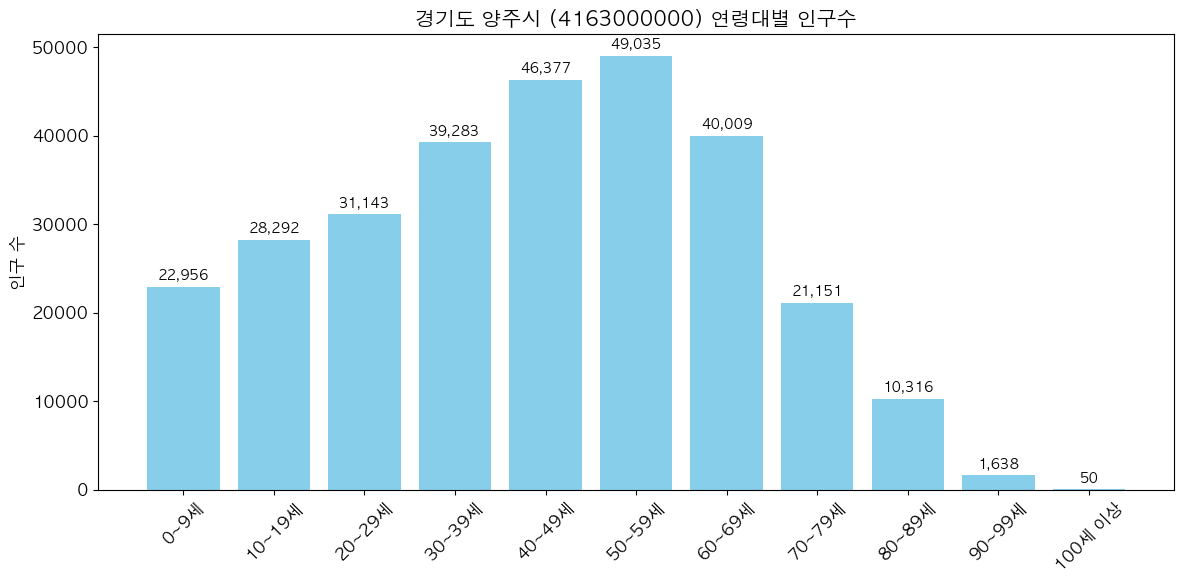

In [7]:
age_cols = pop_1.columns[3:14]
age_values = pop_1.iloc[0, 3:14].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)
x_labels = [col.replace("계_", "") for col in age_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, age_values, color='skyblue')
plt.xticks(rotation=45)
plt.title(f"{pop_1.iloc[0, 0]} 연령대별 인구수")
plt.ylabel("인구 수")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 400,  # 막대보다 약간 위에
        f'{height:,}',  # 천 단위 쉼표 표시
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [8]:
pop_2 = pd.read_csv("datas/population_all_Y.csv", encoding="cp949")
pop_2.columns = (
    pop_2.columns.str.replace('2025년03월_', '', regex=False)
)
pop_2

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,경기도 양주시 (4163000000),"290,250","129,197",2.25,"146,035","144,215",1.01
1,경기도 양주시 백석읍(4163025000),"25,504","12,027",2.12,"12,886","12,618",1.02
2,경기도 양주시 은현면(4163031000),"5,138","2,934",1.75,"2,951","2,187",1.35
3,경기도 양주시 남면(4163032000),"6,052","3,517",1.72,"3,425","2,627",1.30
4,경기도 양주시 광적면(4163033000),"10,588","5,595",1.89,"5,749","4,839",1.19
5,경기도 양주시 장흥면(4163034000),"12,027","6,368",1.89,"6,063","5,964",1.02
6,경기도 양주시 양주1동(4163051000),"4,500","2,385",1.89,"2,325","2,175",1.07
7,경기도 양주시 양주2동(4163052000),"49,233","20,485",2.40,"24,054","25,179",0.96
8,경기도 양주시 회천1동(4163053000),"8,668","4,296",2.02,"4,521","4,147",1.09
9,경기도 양주시 회천2동(4163054000),"45,809","20,433",2.24,"23,015","22,794",1.01


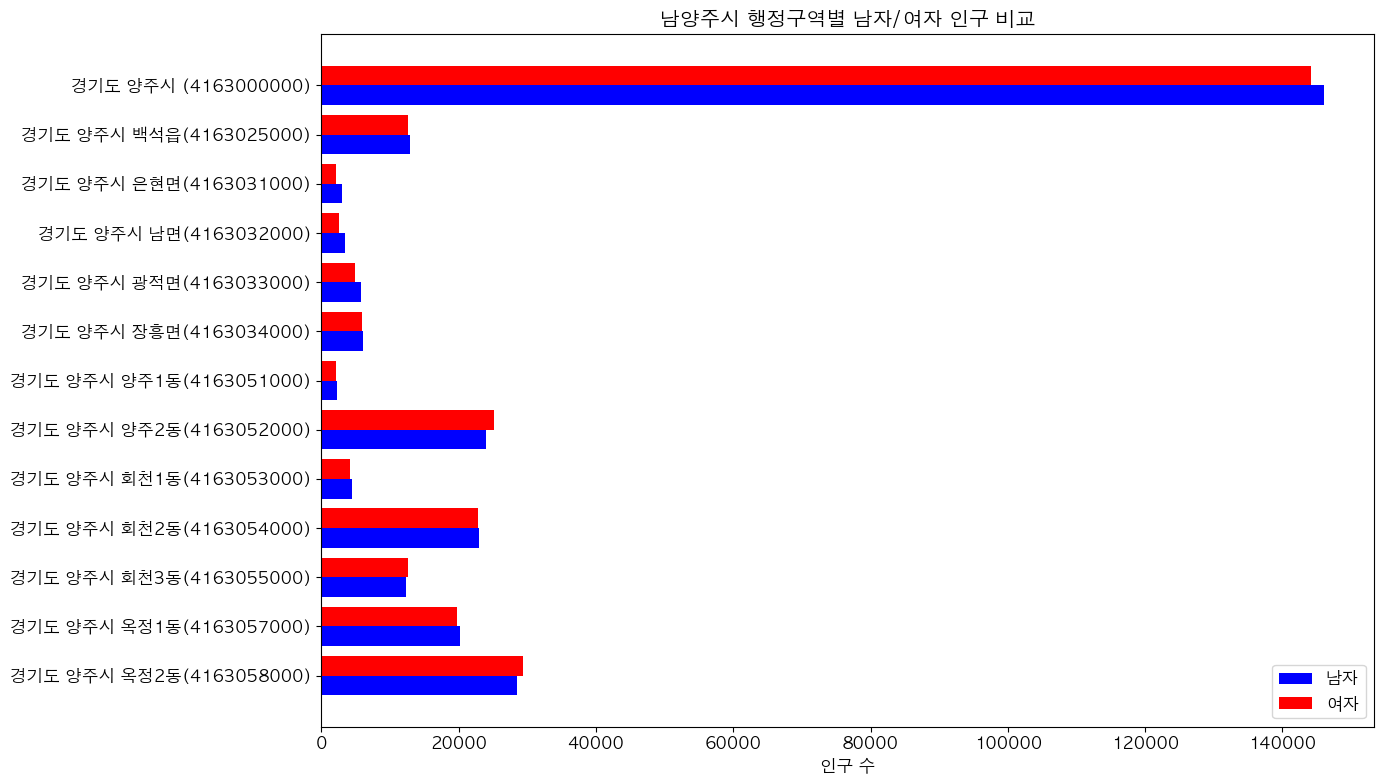

In [9]:
pop_2['남자 인구수'] = pop_2['남자 인구수'].str.replace(',', '').astype(int)
pop_2['여자 인구수'] = pop_2['여자 인구수'].str.replace(',', '').astype(int)

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(pop_2))

plt.barh([i + bar_width for i in index], pop_2['남자 인구수'], bar_width, label='남자', color='blue')
plt.barh(index, pop_2['여자 인구수'], bar_width, label='여자', color='red')

plt.yticks([i + bar_width / 2 for i in index], pop_2['행정구역'])
plt.xlabel('인구 수')
plt.title('남양주시 행정구역별 남자/여자 인구 비교')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [10]:
행정구역 = [
    '양주시', '양주시 백석읍', '양주시 은현면', '양주시 남면', '양주시 광적면', '양주시 장흥면',
    '양주시 양주1동', '양주시 양주2동', '양주시 회천1동', '양주시 회천2동', '양주시 회천3동',
    '양주시 옥정1동', '양주시 옥정2동'
]

인구수 = [
    290250, 25504, 5138, 6052, 10588, 12027,
    4500, 49233, 8668, 45809, 24929, 39925, 57877
]

# 위도 리스트 (행정구역 순서에 맞춰 입력)
위도 = [
    37.7854,     # 양주시청 기준
    37.7933,     # 백석읍사무소
    37.8693,     # 은현면사무소
    37.9332,     # 남면사무소
    37.8464,     # 광적면사무소
    37.7377,     # 장흥면사무소
    37.8008,     # 양주1동 행정복지센터
    37.8077,     # 양주2동 행정복지센터
    37.8270,     # 회천1동 행정복지센터
    37.8319,     # 회천2동 행정복지센터
    37.8397,     # 회천3동 행정복지센터
    37.8278,     # 옥정1동 주민센터
    37.8269      # 옥정2동 주민센터
]

경도 = [
    127.0451,    # 양주시청 기준
    126.9707,    # 백석읍사무소
    126.9899,    # 은현면사무소
    126.9848,    # 남면사무소
    126.9813,    # 광적면사무소
    126.9886,    # 장흥면사무소
    127.0504,    # 양주1동 행정복지센터
    127.0583,    # 양주2동 행정복지센터
    127.0613,    # 회천1동 행정복지센터
    127.0751,    # 회천2동 행정복지센터
    127.0872,    # 회천3동 행정복지센터
    127.0953,    # 옥정1동 주민센터
    127.0822     # 옥정2동 주민센터
]

df = pd.DataFrame({
    '행정구역': 행정구역,
    '인구수': 인구수,
    '위도': 위도,
    '경도': 경도
})


m = folium.Map(location=[37.83, 127.03], zoom_start=11)

for _, row in df.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        population_text = f"{row['인구수']:,}명" if row['인구수'] > 0 else "정보 없음" # 0명일 경우 다르게 표시 (선택사항)
        popup = f"<b>{row['행정구역']}</b><br>인구수: {population_text}"
        if row['인구수'] >= 200000:
            color = 'orange' 
        elif row['인구수'] >= 13000:
            color = 'red'
        else:
            color = 'blue'
        
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=popup,
            tooltip=row['행정구역'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

m.save("yangju_population_map.html")
m


In [11]:
pop_3 = pd.read_csv("datas/population_change_Y.csv", encoding="cp949")
pop_3

,행정구역,2017년_전년인구수_남자인구수,2017년_전년인구수_여자인구수,2017년_전년인구수_계,2017년_당년인구수_남자인구수,2017년_당년인구수_여자인구수,2017년_당년인구수_계,2017년_인구증감_남자인구수,2017년_인구증감_여자인구수,2017년_인구증감_계,...,2023년_인구증감_계,2024년_전년인구수_남자인구수,2024년_전년인구수_여자인구수,2024년_전년인구수_계,2024년_당년인구수_남자인구수,2024년_당년인구수_여자인구수,2024년_당년인구수_계,2024년_인구증감_남자인구수,2024년_인구증감_여자인구수,2024년_인구증감_계
0,경기도 양주시 (4163000000),"104,235","101,278","205,513","107,650","104,496","212,146","3,415","3,218","6,633",...,"24,594","135,376","132,650","268,026","145,474","143,531","289,005","10,098","10,881","20,979"
1,경기도 양주시 백석읍(4163025000),"14,483","14,097","28,580","14,213","13,820","28,033",-270,-277,-547,...,-741,"12,723","12,421","25,144","12,823","12,595","25,418",100,174,274
2,경기도 양주시 은현면(4163031000),"3,803","2,997","6,800","3,701","2,890","6,591",-102,-107,-209,...,-187,"3,125","2,330","5,455","2,976","2,197","5,173",-149,-133,-282
3,경기도 양주시 남면(4163032000),"4,193","3,457","7,650","4,146","3,372","7,518",-47,-85,-132,...,-396,"3,637","2,806","6,443","3,472","2,679","6,151",-165,-127,-292
4,경기도 양주시 광적면(4163033000),"6,419","5,545","11,964","6,743","5,823","12,566",324,278,602,...,-504,"6,046","5,078","11,124","5,802","4,879","10,681",-244,-199,-443
5,경기도 양주시 장흥면(4163034000),"5,137","4,964","10,101","5,267","5,020","10,287",130,56,186,...,386,"6,023","5,784","11,807","6,020","5,893","11,913",-3,109,106
6,경기도 양주시 양주1동(4163051000),"3,253","2,993","6,246","3,111","2,876","5,987",-142,-117,-259,...,-224,"2,488","2,292","4,780","2,342","2,196","4,538",-146,-96,-242
7,경기도 양주시 양주2동(4163052000),"26,683","27,720","54,403","26,213","27,176","53,389",-470,-544,"-1,014",...,-487,"24,712","25,906","50,618","24,088","25,243","49,331",-624,-663,"-1,287"
8,경기도 양주시 회천1동(4163053000),"5,368","5,018","10,386","5,238","4,884","10,122",-130,-134,-264,...,-455,"4,778","4,266","9,044","4,548","4,146","8,694",-230,-120,-350
9,경기도 양주시 회천2동(4163054000),"14,602","14,150","28,752","14,271","13,851","28,122",-331,-299,-630,...,"9,338","18,429","18,162","36,591","22,730","22,481","45,211","4,301","4,319","8,620"


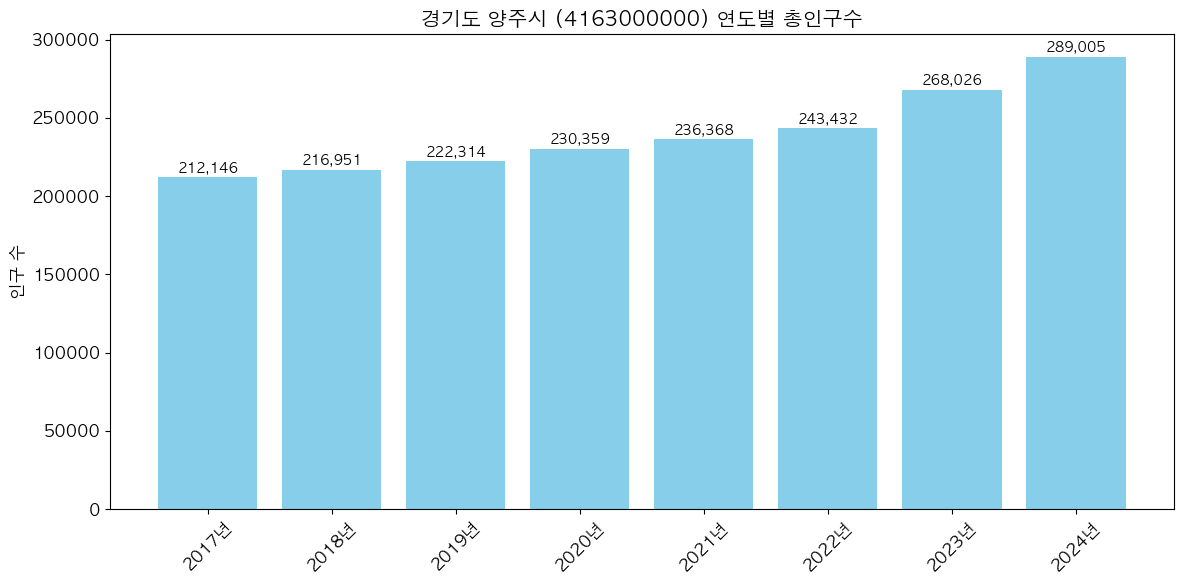

In [12]:
total_pop_cols = [col for col in pop_3.columns if "_당년인구수" in col and "남자" not in col and "여자" not in col
]
age_values = pop_3.loc[0, total_pop_cols].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)

age_cols = [col.replace("_당년인구수_계", "") for col in total_pop_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(age_cols, age_values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1000,
        f'{height:,}',
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.title(f"{pop_3.iloc[0, 0]} 연도별 총인구수")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()